<a href="https://colab.research.google.com/github/sehrduaa/Students-elearning-assessment-/blob/main/Code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import math

import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
dataset = pd.read_csv("xAPI-Edu-Data.csv")
dataset.head()



,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
df = dataset[['gender','PlaceofBirth','StageID','Topic','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class']]
df.head()

,gender,PlaceofBirth,StageID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,lowerlevel,IT,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,lowerlevel,IT,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,lowerlevel,IT,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,lowerlevel,IT,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,lowerlevel,IT,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.groupby(['ParentschoolSatisfaction'])['Class'].value_counts(normalize=True)

ParentschoolSatisfaction  Class
Bad                       L        0.446809
                          M        0.425532
                          H        0.127660
Good                      M        0.448630
                          H        0.404110
                          L        0.147260
Name: Class, dtype: float64

In [ ]:
df.groupby(['ParentAnsweringSurvey'])['ParentschoolSatisfaction'].value_counts(normalize=True)

ParentAnsweringSurvey  ParentschoolSatisfaction
No                     Bad                         0.690476
                       Good                        0.309524
Yes                    Good                        0.840741
                       Bad                         0.159259
Name: ParentschoolSatisfaction, dtype: float64

In [ ]:
df.groupby(['ParentAnsweringSurvey'])['Class'].value_counts(normalize=True)

ParentAnsweringSurvey  Class
No                     L        0.471429
                       M        0.395238
                       H        0.133333
Yes                    M        0.474074
                       H        0.422222
                       L        0.103704
Name: Class, dtype: float64

In [ ]:
df2 = dataset[['gender','raisedhands','VisITedResources','AnnouncementsView','Discussion','StudentAbsenceDays', 'Class']]
df2.head()

,gender,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,15,16,2,20,Under-7,M
1,M,20,20,3,25,Under-7,M
2,M,10,7,0,30,Above-7,L
3,M,30,25,5,35,Above-7,L
4,M,40,50,12,50,Above-7,M


In [ ]:
#behavorial Patterns
df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)
df2.groupby(['raisedhands'])['Class'].value_counts(normalize=True)

<ipython-input-47-351b6b364861>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['raisedhands'] = pd.cut(df2.raisedhands, bins=3, labels=np.arange(3), right=False)


raisedhands  Class
0            L        0.534314
             M        0.392157
             H        0.073529
1            M        0.577778
             H        0.288889
             L        0.133333
2            H        0.543011
             M        0.424731
             L        0.032258
Name: Class, dtype: float64

In [ ]:
df2['VisITedResources'] = pd.cut(df2.VisITedResources, bins=3, labels=np.arange(3), right=False)
df2.groupby(['VisITedResources'])['Class'].value_counts(normalize=True)

<ipython-input-48-5114ce241197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VisITedResources'] = pd.cut(df2.VisITedResources, bins=3, labels=np.arange(3), right=False)


VisITedResources  Class
0                 L        0.656250
                  M        0.293750
                  H        0.050000
1                 M        0.560976
                  H        0.231707
                  L        0.207317
2                 M        0.495798
                  H        0.483193
                  L        0.021008
Name: Class, dtype: float64

In [ ]:
df2.groupby(['StudentAbsenceDays'])['Class'].value_counts(normalize=True)

StudentAbsenceDays  Class
Above-7             L        0.607330
                    M        0.371728
                    H        0.020942
Under-7             M        0.484429
                    H        0.477509
                    L        0.038062
Name: Class, dtype: float64

In [ ]:
correlation = df2[['raisedhands','VisITedResources','AnnouncementsView','Discussion']].corr(method='pearson')
correlation

,AnnouncementsView,Discussion
AnnouncementsView,1.00000,0.41729
Discussion,0.41729,1.00000


In [ ]:
df2 = pd.concat([df2,pd.get_dummies(df2['gender'], prefix='gender_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['StudentAbsenceDays'], prefix='absence_')], axis=1)
df2 = pd.concat([df2,pd.get_dummies(df2['Class'], prefix='class_')], axis=1)

df2.drop(['gender'], axis = 1,inplace=True)
df2.drop(['StudentAbsenceDays'], axis = 1,inplace=True)
df2.drop(['Class'], axis = 1,inplace=True)

df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender__F,gender__M,absence__Above-7,absence__Under-7,class__H,class__L,class__M
0,0,0,2,20,0,1,0,1,0,0,1
1,0,0,3,25,0,1,0,1,0,0,1
2,0,0,0,30,0,1,1,0,0,1,0
3,0,0,5,35,0,1,1,0,0,1,0
4,1,1,12,50,0,1,1,0,0,0,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
X = df2[['raisedhands', 'VisITedResources']].values
#NORMALIZE OUR ARRAY
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
#GET X AXIS
X = pd.DataFrame(x_scaled).values
X[:10]

array([[0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0.5, 0.5],
       [0.5, 0. ],
       [0.5, 0. ],
       [0.5, 0. ],
       [0. , 0. ],
       [1. , 1. ]])

In [ ]:
#CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.252541  ,  0.11953451,  0.23013742,  0.2719661 ,  0.3962025 ,
        -0.28207445, -0.2883343 ,  0.25179437,  0.24647298, -0.38896358]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.11474141, 0.10045145, 0.11219937, 0.11699206, 0.13246818,
        0.06722636, 0.06680685, 0.11465577, 0.11404726, 0.06041131]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.6996899

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2974 - accuracy: 0.9128
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1455 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1099 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9766


In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.4632543e-06, 5.0267133e-09, 2.4374813e-06, 4.1367828e-05,
        8.1771631e-11, 1.3401423e-08, 3.7510934e-13, 9.9990273e-01,
        4.6250480e-07, 5.0583469e-05],
       [4.1154692e-08, 8.0816171e-06, 9.9998105e-01, 1.3707148e-06,
        3.0479701e-14, 3.8978676e-08, 1.7719193e-08, 7.1090676e-14,
        9.3772633e-06, 8.4309025e-13],
       [8.0117633e-07, 9.9830484e-01, 6.6343637e-05, 1.7567992e-06,
        5.0563984e-05, 8.4007655e-07, 4.8302449e-05, 9.1794651e-04,
        6.0789433e-04, 6.8658295e-07],
       [9.9990952e-01, 3.3319295e-11, 2.6587666e-06, 3.2648683e-07,
        8.4175156e-08, 4.2670035e-07, 5.2322230e-05, 1.1589151e-05,
        4.2647824e-07, 2.2609798e-05],
       [5.6275928e-07, 5.8962994e-09, 4.1021062e-07, 4.5246995e-08,
        9.9883658e-01, 4.7136220e-07, 4.8548636e-06, 2.1669619e-04,
        8.1321610e-07, 9.3966018e-04]], dtype=float32)>

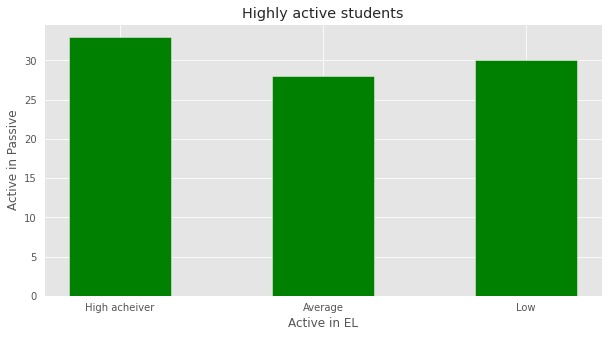

In [ ]:

# Dataset generation
data_dict = {'High acheiver':33, 'Average':28, 'Low':30}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(courses, values, color ='green',
        width = 0.5)
plt.xlabel("Active in EL")
plt.ylabel("Active in Passive")
plt.title("Highly active students")
plt.show()